##### The Purpose of this notebook is to compare the Mann-Whitney U test and the t-test as means of rejecting the null hypothisis on large, simulated data sets. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def generate_data(signal, noise=np.random.randn, N=1000, domain=(-1,1)):  #by defult, noise is Gaussian with mean=0, sigma=1
    s = np.array([signal(np.random.rand(domain)) for i in range(N)])
    return s + noise(N)

Test generate_data with signal funciton = 0, and compare to gaussian theory line. This is the same as covering you're tellescope, or turning off the accelorator, and continueing to collect data. I will use a histagram because we expect the result to be gaussian; later I will switch to scatter plots because the signal contribution is non-trival. 

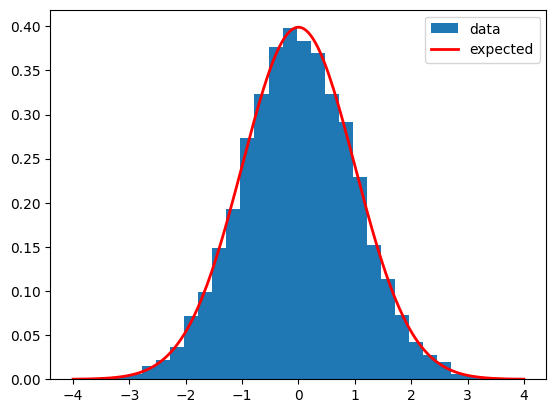

In [4]:
s = np.zeros(10000)
data = generate_data(s)

def gaussian(x, mean=0, std=1):  # for theory line below
    return (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std)**2)

plt.hist(data, density=True, bins=30, label='data')
x = np.linspace(-4, 4, 200)
plt.plot(x, gaussian(x), label='expected', c='r', linewidth=2)
plt.legend()
plt.show()

Test generate data with gaussian signal function.

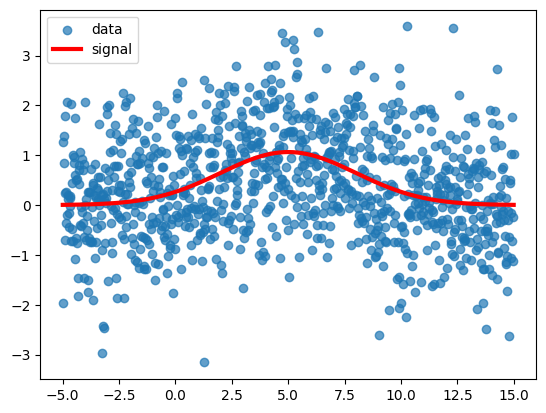

In [27]:
f = lambda x: 8*gaussian(x, mean=5, std=3)   # f(x) = x; gaussian signal function

x = np.linspace(-5,15, 1000)
s = f(x)

data = generate_data(s)

plt.scatter(x, data, alpha=.7, label='data')
plt.plot(x, s, c='r', linewidth=3, label='signal')
plt.legend()
plt.show()

Generate two data sets using the gaussian signal function.

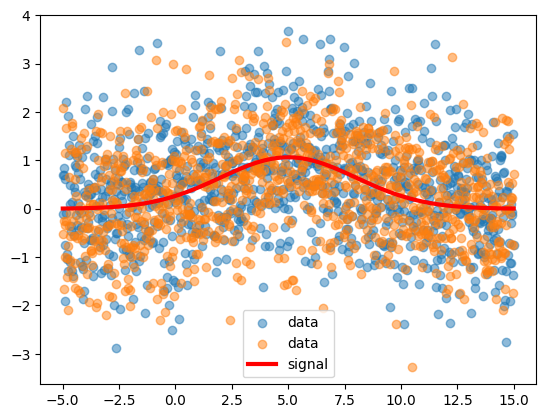

In [29]:
dataA = generate_data(s)
dataB = generate_data(s)    #note: A and B differ since gnerate_data contains call to random

plt.scatter(x, dataA, alpha=.5, label='data')
plt.scatter(x, dataB, alpha=.5, label='data')
plt.plot(x, f(x), c='r', label="signal", linewidth=3)
plt.legend()
plt.show()

Now, we have two independent data sets with Gaussian error and Gaussian signal. We can compare them using the two methods of intrest (MW and T), and expect to find that the null hypothisis cannot be rejected.

In [30]:
### First: Mann-Whitney ###
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
U_statistic, p_value = mannwhitneyu(dataA, dataB, alternative='two-sided')

# Choose your significance level
alpha = 0.05  #choice of 95% confidence

print("Using Mann-Whitney:")
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference between process A and process B (p-value = {p_value})")
else:
    print(f"Fail to reject the null hypothesis. There is no significant difference between process A and process B (p-value = {p_value})")

Using Mann-Whitney:
Fail to reject the null hypothesis. There is no significant difference between process A and process B (p-value = 0.1883621324207212)


In [31]:
### Second: t-Test ###
from scipy.stats import ttest_ind

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(dataA, dataB, equal_var=False)

print("Using t-Test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Determine if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between group A and group B")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between group A and group B")

Using t-Test:
T-statistic: 1.5737966350136243
P-value: 0.11569304661889558
Fail to reject the null hypothesis: There is no significant difference between group A and group B


Now, we regenerate dataA and dataB with slightly diffrent mean, we expect both tests to reject the null in this case.

In [64]:
x = np.linspace(-5,15, 100000)
fA = lambda x: 8*gaussian(x, mean=4, std=3)  
sA = fA(x)
fB = lambda x: 8*gaussian(x, mean=5, std=3)
sB = fB(x)

dataA = generate_data(sA)
dataB = generate_data(sB)

In [65]:
### First: Mann-Whitney ###
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
U_statistic, p_value = mannwhitneyu(dataA, dataB, alternative='two-sided')

# Choose your significance level
alpha = 0.05  #choice of 95% confidence

print("Using Mann-Whitney:")
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference between process A and process B (p-value = {p_value})")
else:
    print(f"Fail to reject the null hypothesis. There is no significant difference between process A and process B (p-value = {p_value})")

Using Mann-Whitney:
Fail to reject the null hypothesis. There is no significant difference between process A and process B (p-value = 0.2735236290338794)


Now, we can use a signal function which suports a perameter which can make the two independent data sets distinct. We will repete the anylisis above anylisis with several values of the perameter. We hope to find that the null hypothisis is rejected when the diffrence perameter is 0.

Take:
$$f(x)=e^{x}+a$$
to be the signal function.  